# DeepArk Supplementary Figure 2 Notebook

## Setup

In [1]:
# Stats etc.
import numpy
import pandas
import h5py

# Viz
import seaborn
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cbook

# Configure pandas printing.
pandas.options.display.max_rows = 12

/data/home/ecofer/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load metadata

In [2]:
# Read in metadata.
feat_df = pandas.read_csv("../DeepArk/data/caenorhabditis_elegans.tsv", sep="\t")
feat_df.drop(["test_auc_roc", "test_auc_prc"], axis=1, inplace=True)

# Ensure proper ordering.
with open("../train/distinct_features.caenorhabditis_elegans.txt", "r") as read_file:
    cur_accessions = [x.strip() for x in read_file.readlines()]
feat_df.set_index("accession", inplace=True)
feat_df = feat_df.loc[cur_accessions, :]
feat_df = feat_df.reset_index()
print("Finished.")

Finished.


## Load predictions

In [3]:
# Load from Zenodo.
df = pandas.read_csv("../data/dcc_data.tsv", sep="\t")
display(df)

# # Load from predictions. NOTE: Uncomment this if you want to use your own predictions!
# h5 = h5py.File("../dcc/outputs/c_elegans_chrX_predictions.h5", "r")
# m = h5["data"][()].copy()
# h5.close()
# tmp = pandas.DataFrame(m, columns=feat_df.accession.tolist())
# df = pandas.read_csv("../dcc/outputs/c_elegans_chrX_row_labels.txt", sep="\t")
# df = df[["chrom", "start", "end"]]
# df = pandas.concat((df, tmp), axis=1, sort=False, ignore_index=True)
# df.columns = ["chrom", "start", "end"] + feat_df.accession.tolist()
# df = df.melt(id_vars=["chrom", "start", "end"], var_name="accession", value_name="prediction")

# Add midpoint.
df["mid"] = df.start + 2047
display(df)

,chrom,start,end,accession,prediction
0,chrX,4095,8190,SRX059242,2.276297e-06
1,chrX,4295,8390,SRX059242,6.665313e-07
2,chrX,4495,8590,SRX059242,4.659558e-07
3,chrX,4695,8790,SRX059242,2.917290e-07
4,chrX,4895,8990,SRX059242,1.666061e-06
...,...,...,...,...,...
5489103,chrX,17709895,17713990,SRX982068,8.356496e-05
5489104,chrX,17710095,17714190,SRX982068,6.437070e-05
5489105,chrX,17710295,17714390,SRX982068,4.623643e-05
5489106,chrX,17710495,17714590,SRX982068,4.117182e-05


,chrom,start,end,accession,prediction,mid
0,chrX,4095,8190,SRX059242,2.276297e-06,6142
1,chrX,4295,8390,SRX059242,6.665313e-07,6342
2,chrX,4495,8590,SRX059242,4.659558e-07,6542
3,chrX,4695,8790,SRX059242,2.917290e-07,6742
4,chrX,4895,8990,SRX059242,1.666061e-06,6942
...,...,...,...,...,...,...
5489103,chrX,17709895,17713990,SRX982068,8.356496e-05,17711942
5489104,chrX,17710095,17714190,SRX982068,6.437070e-05,17712142
5489105,chrX,17710295,17714390,SRX982068,4.623643e-05,17712342
5489106,chrX,17710495,17714590,SRX982068,4.117182e-05,17712542


In [4]:
# Subset to just the DCC-relevant accessions.
dcc_factors = {"sdc-1", "sdc-2", "sdc-3", "dpy-26", "dpy-27", "dpy-28", "dpy-30", "mix-1"}
dcc_accessions = set(feat_df.accession.loc[feat_df.assay_target.isin(dcc_factors)].tolist())
plt_df = df.loc[df.accession.isin(dcc_accessions)].pivot_table(index=["chrom", "start", "end", "mid"], columns="accession", values="prediction")
display(plt_df)

accession                            SRX059242     SRX063960  SRX212235  \
chrom start    end      mid                                               
chrX  4095     8190     6142      2.276297e-06  8.378623e-07   0.000125   
      4295     8390     6342      6.665313e-07  2.208334e-07   0.000049   
      4495     8590     6542      4.659558e-07  6.752723e-07   0.000009   
      4695     8790     6742      2.917290e-07  9.571597e-07   0.000001   
      4895     8990     6942      1.666061e-06  1.177509e-06   0.000049   
...                                        ...           ...        ...   
      17709895 17713990 17711942  1.509961e-05  2.527992e-06   0.000652   
      17710095 17714190 17712142  3.157312e-06  8.640262e-07   0.000068   
      17710295 17714390 17712342  3.143771e-06  6.493571e-07   0.000261   
      17710495 17714590 17712542  1.644043e-06  6.650731e-07   0.000017   
      17710695 17714790 17712742  5.768278e-06  7.972841e-07   0.000637   

accession                         SRX2228847    SRX2228848  SRX2228849  \
chrom start    end      mid                                              
chrX  4095     8190     6142        0.000038  6.696652e-06    0.000004   
      4295     8390     6342        0.000005  2.627880e-06    0.000005   
      4495     8590     6542        0.000008  8.941091e-07    0.000021   
      4695     8790     6742        0.000010  2.998044e-07    0.000021   
      4895     8990     6942        0.000023  1.044399e-05    0.000050   
...                                      ...           ...         ...   
      17709895 17713990 17711942    0.000387  5.018459e-04    0.000024   
      17710095 17714190 17712142    0.000113  1.726344e-04    0.000015   
      17710295 17714390 17712342    0.000098  2.143250e-04    0.000018   
      17710495 17714590 17712542    0.000058  6.862062e-05    0.000013   
      17710695 17714790 17712742    0.000101  6.522128e-04    0.000020   

accession                           SRX2228850  SRX2228851  SRX2228852  \
chrom start    end      mid                                              
chrX  4095     8190     6142      7.648026e-07    0.000002    0.000006   
      4295     8390     6342      1.014495e-06    0.000001    0.000002   
      4495     8590     6542      2.041806e-06    0.000003    0.000006   
      4695     8790     6742      1.090216e-06    0.000006    0.000010   
      4895     8990     6942      1.206322e-05    0.000039    0.000015   
...                                        ...         ...         ...   
      17709895 17713990 17711942  5.087203e-05    0.000075    0.000049   
      17710095 17714190 17712142  1.482822e-05    0.000026    0.000013   
      17710295 17714390 17712342  1.661179e-05    0.000018    0.000010   
      17710495 17714590 17712542  7.237879e-06    0.000026    0.000007   
      17710695 17714790 17712742  2.272921e-05    0.000037    0.000007   

accession                         SRX2228853  ...  SRX657411  SRX982060  \
chrom start    end      mid                   ...                         
chrX  4095     8190     6142        0.000002  ...   0.000009   0.000003   
      4295     8390     6342        0.000002  ...   0.000005   0.000002   
      4495     8590     6542        0.000002  ...   0.000008   0.000004   
      4695     8790     6742        0.000003  ...   0.000002   0.000002   
      4895     8990     6942        0.000010  ...   0.000019   0.000010   
...                                      ...  ...        ...        ...   
      17709895 17713990 17711942    0.000088  ...   0.000037   0.000039   
      17710095 17714190 17712142    0.000029  ...   0.000015   0.000007   
      17710295 17714390 17712342    0.000015  ...   0.000021   0.000012   
      17710495 17714590 17712542    0.000010  ...   0.000007   0.000007   
      17710695 17714790 17712742    0.000023  ...   0.000016   0.000031   

accession                            SRX982061     SRX982062  SRX982063  \
chrom start    end      mid                    

In [5]:
# Calculate mean across DCC features at each position.
tmp = plt_df.reset_index()
lhs = pandas.DataFrame(tmp[["chrom", "start", "end", "mid"]].values, columns=["chrom", "start", "end", "mid"])
rhs = tmp.drop(["chrom", "start", "end", "mid"], axis=1)
lhs["mean"] = numpy.mean(rhs.values, axis=1)
plt_df = lhs
display(plt_df)

,chrom,start,end,mid,mean
0,chrX,4095,8190,6142,0.000013
1,chrX,4295,8390,6342,0.000003
2,chrX,4495,8590,6542,0.000004
3,chrX,4695,8790,6742,0.000004
4,chrX,4895,8990,6942,0.000013
...,...,...,...,...,...
88529,chrX,17709895,17713990,17711942,0.000101
88530,chrX,17710095,17714190,17712142,0.000031
88531,chrX,17710295,17714390,17712342,0.000040
88532,chrX,17710495,17714590,17712542,0.000017


In [6]:
# Find the top 3 sites for later investigation with ISM.
tmp = plt_df.sort_values("mean")
tmp = tmp.iloc[-15:]
tmp = tmp.sort_values("mean", ascending=False)
pred_dict = dict()
rank_dict = dict()
for i, (chrom, start, end, mid, pred) in enumerate(tmp[["chrom", "start", "end", "mid", "mean"]].itertuples(name=None, index=False)):
    loci = "{}:{}-{}".format(chrom, start, end)
    rank_dict[i] = (loci, pred, mid)
print("Site 1:", rank_dict[0][0])
print("Site 2:", rank_dict[1][0])
print("Site 3:", rank_dict[2][0])

Site 1: chrX:6294495-6298590
Site 2: chrX:14523895-14527990
Site 3: chrX:11092095-11096190


## Configure plots

In [7]:
matplotlib.rc('font', size=12)

def reset_plot_config():
    seaborn.set()
    matplotlib.rcParams.update(matplotlib.rcParamsDefault)

    d = {"lines.linewidth": 0.4,
        "axes.linewidth": 0.4,
        "ytick.major.width": 0.4,
        "xtick.major.width": 0.4,
        "xtick.major.size": 3,
        "ytick.major.size": 3,
        "xtick.major.pad": 1,
        "ytick.major.pad": 1}

    for k, v in d.items():
        matplotlib.rcParams[k] = v

    matplotlib.rcParams["figure.dpi"] = 300
    matplotlib.rcParams["axes.facecolor"] = "none"
    matplotlib.rcParams["figure.facecolor"] = "none"
    matplotlib.rcParams["xtick.labelsize"] = 6
    matplotlib.rcParams["ytick.labelsize"] = 6
    matplotlib.rcParams["axes.labelsize"] = 6
    matplotlib.rcParams['axes.titlesize'] = 6
    matplotlib.rcParams['legend.fontsize'] = 6
    matplotlib.rcParams['axes.titlepad'] = 4
    matplotlib.rcParams['axes.ymargin'] = 0
    matplotlib.rcParams['axes.xmargin'] = 0
    for x in ["left", "right", "top", "bottom"]:
        matplotlib.rcParams["figure.subplot.{}".format(x)] = 0.08 if x in {"left",  "bottom"} else 0.99

    matplotlib.rcParams["legend.fancybox"] = False

    # Legend settings:
    d = {"legend.borderpad" : 0.4,  
        "legend.labelspacing" : 0.0,  
        "legend.handlelength" : 2.0,  
        "legend.handleheight" : 0.7,
        "legend.handletextpad" : 0.,
        "legend.borderaxespad" : 0.4,
        "legend.fontsize": 6,
        "legend.borderpad": 0.4}

    #legend.columnspacing}
    for k, v in d.items():
        matplotlib.rcParams[k] = v

reset_plot_config()

## Visualize results

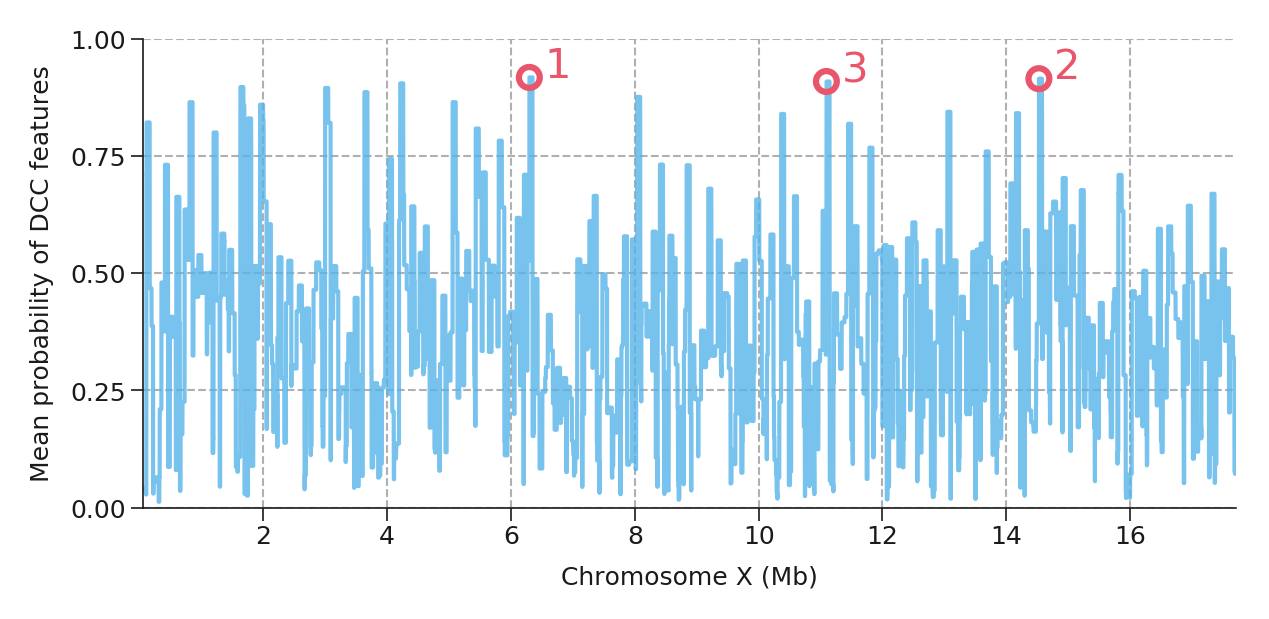

In [8]:
# Get bin-wise max.
rolled_plt_df = plt_df[["mid", "mean"]].rolling(250).max() # 250 * 200 bp = 50kb

# Build plot.
fig, axes = plt.subplots(1, 1, figsize=(11/2.54, 5.5/2.54), facecolor='w', edgecolor='k')
plt.plot(rolled_plt_df.mid.values, rolled_plt_df["mean"].values, lw=1, alpha=0.8, color="#56b4e9")
# Highlight top 3 locations.
for i in range(3):
    loci, pred, mid = rank_dict[i]
    plt.scatter(mid, pred, lw=1.5, alpha=1, s=25, edgecolor="#e9566b", color='none', zorder=1000, marker='o')
    plt.text(mid+2.5e5, pred, i + 1, ha='left', color="#e9566b")

# Config ax.
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1], minor=False)
plt.ylim(-0.0, 1)
plt.gca().set_xticks(numpy.array([0, .2, .4, .6, .8, 1, 1.2, 1.4, 1.6]) * 1e7, minor=False)
plt.gca().set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14", "16"])
plt.ylabel("Mean probability of DCC features")
plt.xlabel("Chromosome X (Mb)")
plt.margins(x=0.0)

# Display.
plt.tight_layout()
plt.show()
plt.close(fig)